# PROCESO DE ETL

1. Extract: traer los datos desde Supabase (data raw)
2. Trasnform: Limpieza, feature engineering, normalización, etc. Preparación para análsisis o modelos.
3. Load: Cargamos los resultados (data clean) a Supabase

## Extract 

In [ ]:
import os
from dotenv import load_dotenv
from supabase import create_client, Client
import pandas as pd

load_dotenv()

supabase_url = os.getenv('SUPABASE_URL')
supabase_apikey=os.getenv('SUPABASE_SERVICE_ROLE_KEY')

# verificar carga de keys
# print(f'SUPABASE_URL: {supabase_url}')
# print(f'SUPABASE_SERVICE_ROL: {supabase_apikey}')

Creación de cliente de supabase

In [2]:
cliente_supa= create_client(supabase_url, supabase_apikey)
response= ( 
    cliente_supa.table("logs_chat")
    .select("*")
    .execute()
)
data= response.data

Data

In [37]:
data_df= pd.DataFrame(data)
data_df

,id,id_conversacion,id_usuario,rol,mensaje,fecha
0,c0903a54-95b1-44a8-bbb7-b07f6d3c430d,06bb2082-fad1-4e10-bdc0-b93469167c51,5671fe73-28bc-4218-a750-80449977e0d0,user,Hola,2025-06-26T17:47:54.782+00:00
1,a76e4c41-efc2-4685-bb4a-acc4d926dd5e,06bb2082-fad1-4e10-bdc0-b93469167c51,bot,bot,¡Hola! Soy tu asistente virtual. Puedo ayudart...,2025-06-26T17:47:55.543+00:00
2,14528e7f-72e5-4bec-b548-d9382d6bd75a,06bb2082-fad1-4e10-bdc0-b93469167c51,5671fe73-28bc-4218-a750-80449977e0d0,user,"2, quiero consultar",2025-06-26T17:48:21.401+00:00
3,a61f51a4-5403-4d48-8006-cc5adebbc208,06bb2082-fad1-4e10-bdc0-b93469167c51,bot,bot,¡Claro! Para poder ayudarte a consultar el est...,2025-06-26T17:48:21.905+00:00
4,445425e2-717c-4073-a62b-cc36e83f5428,06bb2082-fad1-4e10-bdc0-b93469167c51,5671fe73-28bc-4218-a750-80449977e0d0,user,"Sí, es 423423",2025-06-26T17:48:29.909+00:00
...,...,...,...,...,...,...
119,f66e69af-a37c-4d75-b40b-62246fcb23f9,807a63dc-01f3-4962-b920-8b7fe2da431d,bot,bot,"Claro, puedo ayudarte con eso. ¿Podrías propor...",2025-07-01T00:03:13.404+00:00
120,0859e246-a333-4477-8dc1-a03425cd9ace,807a63dc-01f3-4962-b920-8b7fe2da431d,859e4806-be0b-46d5-8ee8-9179278b51e3,user,"claro, es 97854",2025-07-01T00:03:41.931+00:00
121,12081fc4-06a4-451f-b81b-4013e49872db,807a63dc-01f3-4962-b920-8b7fe2da431d,bot,bot,Gracias por el número de pedido. Estoy revisan...,2025-07-01T00:03:42.456+00:00
122,b42fb7df-61ea-4a94-9a77-5a3864dd9fa9,807a63dc-01f3-4962-b920-8b7fe2da431d,859e4806-be0b-46d5-8ee8-9179278b51e3,user,"genial, graciaas",2025-07-01T00:03:54.301+00:00


## Transform

Flujo:
Nueva interacción (chatbot-user) => Almacena en Supabase => Extraer data => Limpia


In [38]:
# Tipo de datos
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               124 non-null    object
 1   id_conversacion  124 non-null    object
 2   id_usuario       124 non-null    object
 3   rol              124 non-null    object
 4   mensaje          124 non-null    object
 5   fecha            124 non-null    object
dtypes: object(6)
memory usage: 5.9+ KB


Como son valores simulados, no hay presencia de nulos.

Obtener datos de columna fecha

In [15]:
(data_df['fecha'][0])
# pasasr cada elemento a timestamp

'2025-06-26T17:47:54.782+00:00'

In [39]:
data_df['fecha']= pd.to_datetime(data_df['fecha'])
data_df['year']=data_df['fecha'].dt.year
data_df['month']=data_df['fecha'].dt.month
data_df['day']=data_df['fecha'].dt.day
data_df['hour']=data_df['fecha'].dt.hour
data_df['minute']=data_df['fecha'].dt.minute

In [41]:
data_df

,id,id_conversacion,id_usuario,rol,mensaje,fecha,year,month,day,hour,minute
0,c0903a54-95b1-44a8-bbb7-b07f6d3c430d,06bb2082-fad1-4e10-bdc0-b93469167c51,5671fe73-28bc-4218-a750-80449977e0d0,user,Hola,2025-06-26 17:47:54.782000+00:00,2025,6,26,17,47
1,a76e4c41-efc2-4685-bb4a-acc4d926dd5e,06bb2082-fad1-4e10-bdc0-b93469167c51,bot,bot,¡Hola! Soy tu asistente virtual. Puedo ayudart...,2025-06-26 17:47:55.543000+00:00,2025,6,26,17,47
2,14528e7f-72e5-4bec-b548-d9382d6bd75a,06bb2082-fad1-4e10-bdc0-b93469167c51,5671fe73-28bc-4218-a750-80449977e0d0,user,"2, quiero consultar",2025-06-26 17:48:21.401000+00:00,2025,6,26,17,48
3,a61f51a4-5403-4d48-8006-cc5adebbc208,06bb2082-fad1-4e10-bdc0-b93469167c51,bot,bot,¡Claro! Para poder ayudarte a consultar el est...,2025-06-26 17:48:21.905000+00:00,2025,6,26,17,48
4,445425e2-717c-4073-a62b-cc36e83f5428,06bb2082-fad1-4e10-bdc0-b93469167c51,5671fe73-28bc-4218-a750-80449977e0d0,user,"Sí, es 423423",2025-06-26 17:48:29.909000+00:00,2025,6,26,17,48
...,...,...,...,...,...,...,...,...,...,...,...
119,f66e69af-a37c-4d75-b40b-62246fcb23f9,807a63dc-01f3-4962-b920-8b7fe2da431d,bot,bot,"Claro, puedo ayudarte con eso. ¿Podrías propor...",2025-07-01 00:03:13.404000+00:00,2025,7,1,0,3
120,0859e246-a333-4477-8dc1-a03425cd9ace,807a63dc-01f3-4962-b920-8b7fe2da431d,859e4806-be0b-46d5-8ee8-9179278b51e3,user,"claro, es 97854",2025-07-01 00:03:41.931000+00:00,2025,7,1,0,3
121,12081fc4-06a4-451f-b81b-4013e49872db,807a63dc-01f3-4962-b920-8b7fe2da431d,bot,bot,Gracias por el número de pedido. Estoy revisan...,2025-07-01 00:03:42.456000+00:00,2025,7,1,0,3
122,b42fb7df-61ea-4a94-9a77-5a3864dd9fa9,807a63dc-01f3-4962-b920-8b7fe2da431d,859e4806-be0b-46d5-8ee8-9179278b51e3,user,"genial, graciaas",2025-07-01 00:03:54.301000+00:00,2025,7,1,0,3


In [ ]:
# data_df.drop('fecha', axis=1, inplace=True)

In [32]:
data_df

,id,id_conversacion,id_usuario,rol,mensaje,year,month,day,hour,minute
0,c0903a54-95b1-44a8-bbb7-b07f6d3c430d,06bb2082-fad1-4e10-bdc0-b93469167c51,5671fe73-28bc-4218-a750-80449977e0d0,user,Hola,2025,6,26,17,47
1,a76e4c41-efc2-4685-bb4a-acc4d926dd5e,06bb2082-fad1-4e10-bdc0-b93469167c51,bot,bot,¡Hola! Soy tu asistente virtual. Puedo ayudart...,2025,6,26,17,47
2,14528e7f-72e5-4bec-b548-d9382d6bd75a,06bb2082-fad1-4e10-bdc0-b93469167c51,5671fe73-28bc-4218-a750-80449977e0d0,user,"2, quiero consultar",2025,6,26,17,48
3,a61f51a4-5403-4d48-8006-cc5adebbc208,06bb2082-fad1-4e10-bdc0-b93469167c51,bot,bot,¡Claro! Para poder ayudarte a consultar el est...,2025,6,26,17,48
4,445425e2-717c-4073-a62b-cc36e83f5428,06bb2082-fad1-4e10-bdc0-b93469167c51,5671fe73-28bc-4218-a750-80449977e0d0,user,"Sí, es 423423",2025,6,26,17,48
...,...,...,...,...,...,...,...,...,...,...
119,f66e69af-a37c-4d75-b40b-62246fcb23f9,807a63dc-01f3-4962-b920-8b7fe2da431d,bot,bot,"Claro, puedo ayudarte con eso. ¿Podrías propor...",2025,7,1,0,3
120,0859e246-a333-4477-8dc1-a03425cd9ace,807a63dc-01f3-4962-b920-8b7fe2da431d,859e4806-be0b-46d5-8ee8-9179278b51e3,user,"claro, es 97854",2025,7,1,0,3
121,12081fc4-06a4-451f-b81b-4013e49872db,807a63dc-01f3-4962-b920-8b7fe2da431d,bot,bot,Gracias por el número de pedido. Estoy revisan...,2025,7,1,0,3
122,b42fb7df-61ea-4a94-9a77-5a3864dd9fa9,807a63dc-01f3-4962-b920-8b7fe2da431d,859e4806-be0b-46d5-8ee8-9179278b51e3,user,"genial, graciaas",2025,7,1,0,3


In [35]:
data_df['id_conversacion'].value_counts()

id_conversacion
aa683863-ba2a-4011-b47d-cd70b0de153f    30
639a0bc8-d73f-481b-933d-e33f277cb21d    24
16efa61d-8b7f-4dc6-9b70-5ab383ebc168    24
964f201e-12fb-42c4-97f4-52d17babe6f1    16
06bb2082-fad1-4e10-bdc0-b93469167c51    14
2879d7bc-dd33-4a03-b6d7-3d4b67b6f78c     8
807a63dc-01f3-4962-b920-8b7fe2da431d     8
Name: count, dtype: int64

In [51]:
data_df['id_conversacion'].nunique()

7

In [52]:
data_df['id_usuario'].nunique()

7

In [50]:
data_df['rol'].value_counts()

rol
user    62
bot     62
Name: count, dtype: int64

In [47]:
df_agrupado = data_df.groupby("id_usuario").agg({
    "mensaje": "count",
    "fecha": ["min", "max"]
})
df_agrupado["duracion"] = (df_agrupado["fecha"]["max"] - df_agrupado["fecha"]["min"]).dt.total_seconds()
df_agrupado

mensaje                            fecha  \
                                       count                              min   
id_usuario                                                                      
5671fe73-28bc-4218-a750-80449977e0d0      20 2025-06-26 17:47:54.782000+00:00   
76df7f6e-89b7-46d7-a676-b055393a7376      15 2025-06-30 22:44:53.027000+00:00   
859e4806-be0b-46d5-8ee8-9179278b51e3       4 2025-07-01 00:00:31.986000+00:00   
8794aacb-692c-4d3e-aeb9-188c91bf1cbf       8 2025-06-30 22:09:02.122000+00:00   
8f8df298-f1a3-4123-b667-a862fdb26465       3 2025-06-26 18:15:05.463000+00:00   
bot                                       62 2025-06-26 17:47:55.543000+00:00   
db50ca34-14d2-4122-8575-1b4bc4c01f6f      12 2025-06-30 22:56:28.498000+00:00   

                                                                       \
                                                                  max   
id_usuario                                                              
5671fe73-28bc-4218-a750-80449977e0d0 2025-06-26 18:05:47.946000+00:00   
76df7f6e-89b7-46d7-a676-b055393a7376 2025-06-30 22:55:27.360000+00:00   
859e4806-be0b-46d5-8ee8-9179278b51e3 2025-07-01 00:03:54.301000+00:00   
8794aacb-692c-4d3e-aeb9-188c91bf1cbf 2025-06-30 22:44:33.707000+00:00   
8f8df298-f1a3-4123-b667-a862fdb26465 2025-06-26 18:15:34.833000+00:00   
bot                                  2025-07-01 00:03:54.971000+00:00   
db50ca34-14d2-4122-8575-1b4bc4c01f6f 2025-06-30 23:04:39.190000+00:00   

                                        duracion  
                                                  
id_usuario                                        
5671fe73-28bc-4218-a750-80449977e0d0    1073.164  
76df7f6e-89b7-46d7-a676-b055393a7376     634.333  
859e4806-be0b-46d5-8ee8-9179278b51e3     202.315  
8794aacb-692c-4d3e-aeb9-188c91bf1cbf    2131.585  
8f8df298-f1a3-4123-b667-a862fdb26465      29.370  
bot                                   368159.428  
db50ca34-14d2-4122-8575-1b4bc4c01f6f     490.692

<Axes: title={'center': 'Conversaciones por día'}, xlabel='fecha'>

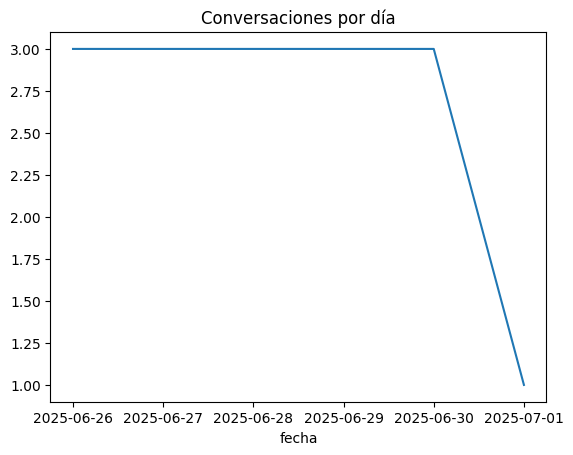

In [55]:
df_v2 = data_df.copy()
df_v2["fecha"] = df_v2['fecha'].dt.date

df_v2.groupby("fecha")["id_conversacion"].nunique().plot(kind='line', title="Conversaciones por día")


In [ ]:
df_v2['fecha'].min()
df_v2['fecha'].max()                                                                                                                   

datetime.date(2025, 7, 1)